# SFR3 Fund - Data Engineer - Interview Exercise

### Import python libraries and load dataset in a Pandas dataframe: Tenant, Rent History

In [450]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator, ScalarFormatter
import pandas as pd

# Open tenant information dataset in a pandas dataframe

tenant_info_df = pd.read_csv(
    filepath_or_buffer="generateData/tenantInformation.csv"
)

rent_info_df = pd.read_csv(
    filepath_or_buffer="generateData/rentInformation.csv"
)

applicant_info_df = pd.read_csv(
    filepath_or_buffer="generateData/applicantInformation.csv"
)

## Tenant Data Analysis

In [451]:
# Show subset of tenant data
tenant_info_df.head(5)

,UUID,Tenant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Utility_Amount,Pet_Amount,Tenant_Screening_Score,House_Plan,Counties
0,1,Sarah Torres,1900,2023-08-26,2024-02-22,172.46,NaN,644,1BHK,Whitfield
1,2,Dorothy Smith,800,2023-10-17,2024-04-14,49.20,NaN,562,2BHK,Appling
2,3,Stephanie Cruz,1800,2023-01-25,2024-01-25,61.35,NaN,844,2BHK,Appling
3,4,Jessica Morales,2000,2023-05-04,2024-05-03,37.92,10.0,842,1BHK,Bacon
4,5,Dorothy Baker,1500,2023-02-11,2024-02-11,168.80,NaN,594,3BHK,Bacon


In [452]:
# Show datatypes of imported values in tenant dataframe
tenant_info_df.dtypes

UUID                        int64
Tenant_Name                object
Rent_Amount                 int64
Lease_Start_Date           object
Lease_End_Date             object
Utility_Amount            float64
Pet_Amount                float64
Tenant_Screening_Score      int64
House_Plan                 object
Counties                   object
dtype: object

In [453]:
#Replace NaN values in Pet_Amount with 0.0
fill_na_values = {"Pet_Amount": 0.0}
tenant_info_df = tenant_info_df.fillna(value=fill_na_values)

# Convert Date Columns from Object to Datetime
tenant_info_df[["Lease_Start_Date", "Lease_End_Date"]] = tenant_info_df[["Lease_Start_Date", "Lease_End_Date"]].apply(pd.to_datetime)

print(tenant_info_df.head(5))
print(tenant_info_df.dtypes)

   UUID      Tenant_Name  Rent_Amount Lease_Start_Date Lease_End_Date  \
0     1     Sarah Torres         1900       2023-08-26     2024-02-22   
1     2    Dorothy Smith          800       2023-10-17     2024-04-14   
2     3   Stephanie Cruz         1800       2023-01-25     2024-01-25   
3     4  Jessica Morales         2000       2023-05-04     2024-05-03   
4     5    Dorothy Baker         1500       2023-02-11     2024-02-11   

   Utility_Amount  Pet_Amount  Tenant_Screening_Score House_Plan   Counties  
0          172.46         0.0                     644       1BHK  Whitfield  
1           49.20         0.0                     562       2BHK    Appling  
2           61.35         0.0                     844       2BHK    Appling  
3           37.92        10.0                     842       1BHK      Bacon  
4          168.80         0.0                     594       3BHK      Bacon  
UUID                               int64
Tenant_Name                       object
Rent_Amount

## Frequency of lease start based on month

Text(0.5, 1.0, 'Frequency of Lease Start Month in Georgia')

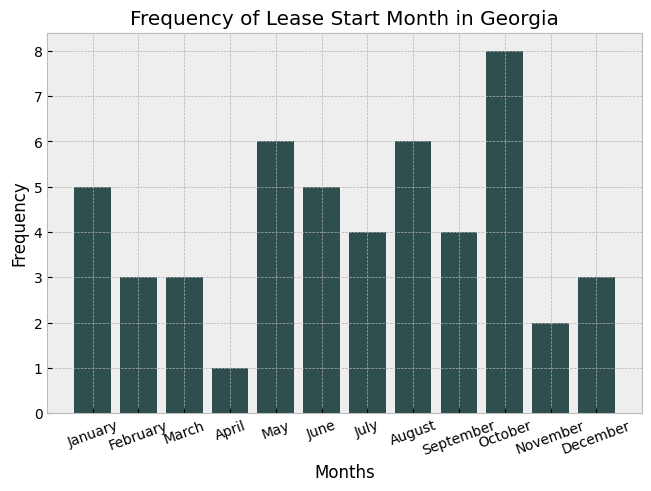

In [454]:
lease_start_month = tenant_info_df.groupby(tenant_info_df["Lease_Start_Date"].dt.month).count()["UUID"].rename("Frequency of Start Month")
month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

lease_month_barchart ={
} 
for init in month_map:
    lease_month_barchart[month_map[init]] = 0

for month, frequency in lease_start_month.items():
    lease_month_barchart[month_map[month]] = frequency
plt.style.use("bmh")
plt.figure(layout='constrained')
plt.xticks(rotation=20)
plt.bar(list(lease_month_barchart.keys()), height = list(lease_month_barchart.values()), color = "darkslategray")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Frequency of Lease Start Month in Georgia")

In [455]:
#Calculate Total Rent Amount for a tenant by adding Base Rent Amount, Utility, and Pet Fees

tenant_info_df["Total_Rent_Amount"] = tenant_info_df["Rent_Amount"] + tenant_info_df["Utility_Amount"] + tenant_info_df["Pet_Amount"]
tenant_info_df.head(5)

,UUID,Tenant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Utility_Amount,Pet_Amount,Tenant_Screening_Score,House_Plan,Counties,Total_Rent_Amount
0,1,Sarah Torres,1900,2023-08-26,2024-02-22,172.46,0.0,644,1BHK,Whitfield,2072.46
1,2,Dorothy Smith,800,2023-10-17,2024-04-14,49.20,0.0,562,2BHK,Appling,849.20
2,3,Stephanie Cruz,1800,2023-01-25,2024-01-25,61.35,0.0,844,2BHK,Appling,1861.35
3,4,Jessica Morales,2000,2023-05-04,2024-05-03,37.92,10.0,842,1BHK,Bacon,2047.92
4,5,Dorothy Baker,1500,2023-02-11,2024-02-11,168.80,0.0,594,3BHK,Bacon,1668.80


In [456]:
# Calculate Average rent per house plan across Counties of Georgia
county_house_rent_avg = tenant_info_df.groupby(["Counties","House_Plan"])["Total_Rent_Amount"].mean().round(2)
# Run this to find info on all the tenants in a particular county, for e.g. "Baker": tenant_info_df[tenant_info_df["Counties"]=="Baker"]
county_house_rent_avg

Counties   House_Plan
Appling    1BHK          1623.79
           2BHK          1355.28
Atkinson   1BHK          1541.80
           2BHK          1548.69
Bacon      1BHK          1622.07
           2BHK          1681.60
           3BHK          1668.80
Baker      1BHK          1811.75
           2BHK          1728.13
Calhoun    2BHK          1521.72
           3BHK          1458.12
Camden     2BHK          1742.93
           3BHK          1223.47
Candler    1BHK           884.23
           3BHK          1109.59
Carroll    1BHK          1751.55
Mitchell   1BHK          1422.37
Monroe     2BHK           848.84
Morgan     2BHK          1458.41
           3BHK          1647.44
Murray     2BHK          1938.18
           3BHK          1567.80
Pulaski    1BHK          1272.22
Putnam     2BHK          1992.16
Quitman    3BHK          1255.42
Rabun      3BHK          1215.84
Wheeler    1BHK          1772.45
           3BHK          1411.79
White      1BHK           951.86
           2BHK      

## Average Rent per house plan across Counties of Georgia

Text(0.5, 1.0, 'Average Rent of 3BHK in Counties of Georgia')

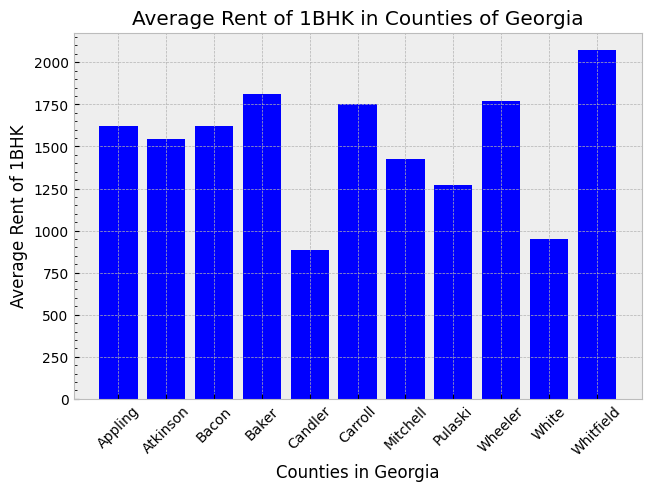

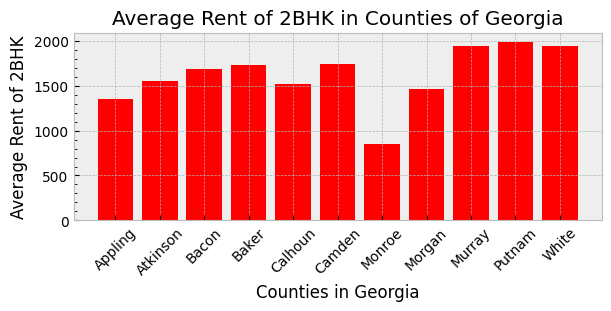

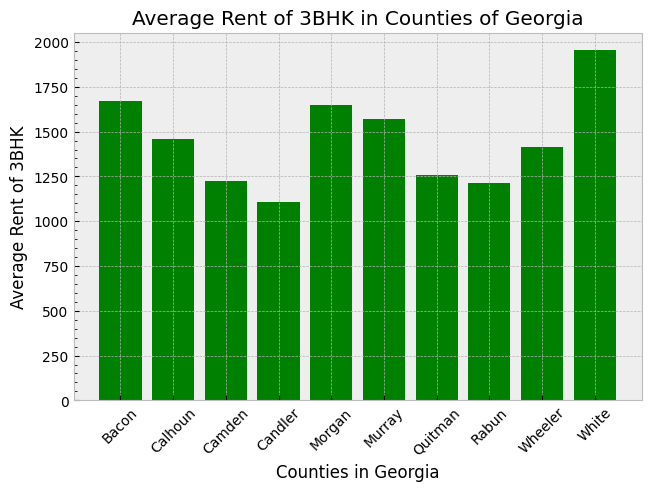

In [457]:
fig, ax = plt.subplots(layout='constrained')
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.style.use("bmh")
for index, rent_avg in county_house_rent_avg.items():
    if index[1] == "1BHK":
        plt.bar(index[0], height = rent_avg, color = "blue")
plt.xlabel("Counties in Georgia")
plt.ylabel("Average Rent of 1BHK")
plt.title("Average Rent of 1BHK in Counties of Georgia")

fig, ax = plt.subplots(figsize=(6, 3), layout='constrained')
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.style.use("bmh")
for index, rent_avg in county_house_rent_avg.items():
    if index[1] == "2BHK":
        plt.bar(index[0], height = rent_avg, color = "red")
plt.xlabel("Counties in Georgia")
plt.ylabel("Average Rent of 2BHK")
plt.title("Average Rent of 2BHK in Counties of Georgia")

fig, ax = plt.subplots(layout='constrained')
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.style.use("bmh")
for index, rent_avg in county_house_rent_avg.items():
    if index[1] == "3BHK":
        plt.bar(index[0], height = rent_avg, color = "green")
plt.xlabel("Counties in Georgia")
plt.ylabel("Average Rent of 3BHK")
plt.title("Average Rent of 3BHK in Counties of Georgia")

## Rent History Data Analysis

In [458]:
# Convert Date Columns from Object to Datetime
rent_info_df["Rent_Paid_Date"] = rent_info_df["Rent_Paid_Date"].apply(pd.to_datetime)

print(rent_info_df.head(5))
print(rent_info_df.dtypes)

                             Payment_ID  Tenant_UUID   Tenant_Name  \
0  e3d61cbb-7180-4b43-87d8-efce729fc362            1  Sarah Torres   
1  39a73131-cd45-4127-b7cc-cb99bce0bf5a            1  Sarah Torres   
2  44dd3e62-c25e-42b1-a6c8-041868c8c910            1  Sarah Torres   
3  2ae4add8-7b70-4d11-b27a-3851258afa92            1  Sarah Torres   
4  d03391d8-7d5d-4f92-afe8-bf3d05940a83            1  Sarah Torres   

       Month_year Rent_Paid_Date  Rent_Amount_Paid  Total_Rent_Amount  \
0     August_2023     2023-08-29           2072.46            2072.46   
1  September_2023     2023-09-25           2072.46            2072.46   
2    October_2023     2023-10-27           2072.46            2072.46   
3   November_2023     2023-11-28           2072.46            2072.46   
4   December_2023     2023-12-26           2072.46            2072.46   

   Rent_Amount_Due Late_Payment  
0              0.0            Y  
1              0.0            N  
2              0.0            N  
3   

In [459]:
#Calculate frequency of late payments per tenant
rent_tenant_late_freq = rent_info_df[rent_info_df["Late_Payment"]=="Y"].groupby(["Tenant_Name", "Tenant_UUID"]).count()["Late_Payment"]

for tenant_info, late_payment_count in rent_tenant_late_freq.items():
    print(f"Tenant Name - {tenant_info[0]}, Tenant UUID - {tenant_info[1]}, Late Payment Count - {late_payment_count}")

Tenant Name - Anthony Rogers, Tenant UUID - 22, Late Payment Count - 4
Tenant Name - Barbara Jackson, Tenant UUID - 10, Late Payment Count - 1
Tenant Name - Barbara Perez, Tenant UUID - 21, Late Payment Count - 3
Tenant Name - Betty Lee, Tenant UUID - 11, Late Payment Count - 5
Tenant Name - Brenda Reyes, Tenant UUID - 50, Late Payment Count - 2
Tenant Name - Brenda Thompson, Tenant UUID - 16, Late Payment Count - 7
Tenant Name - Brian Peterson, Tenant UUID - 47, Late Payment Count - 5
Tenant Name - Carol Young, Tenant UUID - 9, Late Payment Count - 6
Tenant Name - Charles Anderson, Tenant UUID - 7, Late Payment Count - 5
Tenant Name - Charles Davis, Tenant UUID - 15, Late Payment Count - 3
Tenant Name - Charles Morgan, Tenant UUID - 24, Late Payment Count - 1
Tenant Name - Daniel Rivera, Tenant UUID - 46, Late Payment Count - 1
Tenant Name - Deborah Wright, Tenant UUID - 45, Late Payment Count - 1
Tenant Name - Donna Allen, Tenant UUID - 48, Late Payment Count - 2
Tenant Name - Donna 

(2023, 1) 2
(2023, 2) 4
(2023, 3) 3
(2023, 4) 5
(2023, 5) 4
(2023, 6) 6
(2023, 7) 9
(2023, 8) 14
(2023, 9) 11
(2023, 10) 21
(2023, 11) 16
(2023, 12) 20
(2024, 1) 17
(2024, 2) 15
(2024, 3) 8


Text(0.5, 1.0, 'Frequency of Late Payments by Months')

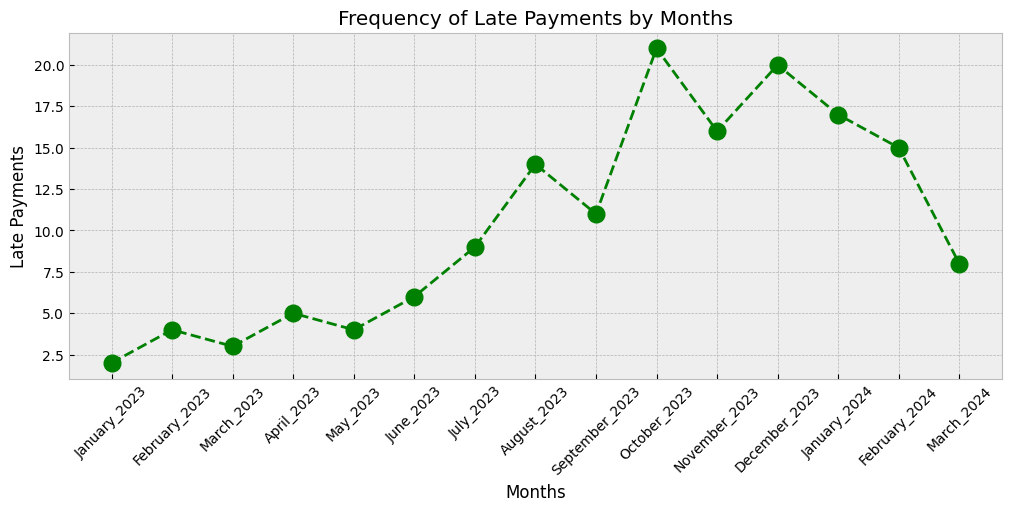

In [460]:
#Calculate frequency of late payments per month
rent_month_late_freq = rent_info_df[rent_info_df["Late_Payment"]=="Y"].groupby([rent_info_df["Rent_Paid_Date"].dt.year, rent_info_df["Rent_Paid_Date"].dt.month]).count()["Late_Payment"]

month_map = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}
x_axis = []
y_axis = []

for ind, val in rent_month_late_freq.items():
    print(ind, val)
    x_axis.append(month_map[ind[1]] + "_" + str(ind[0]))
    y_axis.append(val)


fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
plt.plot(x_axis, y_axis, 'go--', linewidth=2, markersize=12)
plt.xticks(rotation=45)
plt.xlabel("Months")
plt.ylabel("Late Payments")
plt.title("Frequency of Late Payments by Months")

## Merge Rent History Data with Tenant data

In [516]:
# Merge Rent History Dataframe with Tenant Information Dataframe
tenant_rent_df = rent_info_df.merge(tenant_info_df, how = "left", left_on="Tenant_UUID", right_on="UUID")

#ASSUMPTION: If the date of rent paid is after 27th of a month, we are classifying it as late
tenant_rent_df.filter(items=["Tenant_Name_x", "Late_Payment", "Tenant_Screening_Score", "Rent_Paid_Date"])

,Tenant_Name_x,Late_Payment,Tenant_Screening_Score,Rent_Paid_Date
0,Sarah Torres,Y,644,2023-08-29
1,Sarah Torres,N,644,2023-09-25
2,Sarah Torres,N,644,2023-10-27
3,Sarah Torres,Y,644,2023-11-28
4,Sarah Torres,N,644,2023-12-26
...,...,...,...,...
444,Brenda Reyes,N,550,2023-10-24
445,Brenda Reyes,Y,550,2023-11-28
446,Brenda Reyes,N,550,2023-12-25
447,Brenda Reyes,N,550,2024-01-20


In [462]:
# Calculate Frequency of Late Payments by grouping them by Tenant_Screening_Score
screening_payment_res = tenant_rent_df[tenant_rent_df["Late_Payment"]=="Y"].groupby(["Tenant_Screening_Score"]).count()["Late_Payment"]
print(screening_payment_res)

Tenant_Screening_Score
544     3
546     1
550     2
562     2
565     7
568     5
573     6
576     4
594     4
602    10
624     4
625     3
627     2
630     2
632     2
637     2
638     3
644     3
645     2
666     7
671     5
682     3
691     3
692     5
695     9
712     1
713     7
715     5
728     2
732     2
746     1
754     1
760     3
786     5
801     5
803     5
815     1
825     4
834     4
842     5
844     4
847     1
Name: Late_Payment, dtype: int64


Text(0.5, 1.0, 'Frequency of Late Payments by Tenant Screening Score')

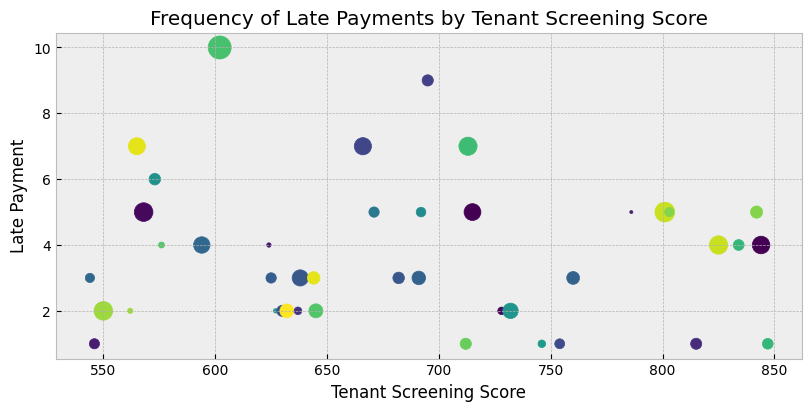

In [463]:
scatter_plot_data = {
    "tenant_screening_score":[],
    "late_payment_count":[],
}
for index, count in screening_payment_res.items():
    scatter_plot_data["tenant_screening_score"].append(index)
    scatter_plot_data["late_payment_count"].append(count)
scatter_plot_data["color"] = np.random.randint(0, 50, len(scatter_plot_data["tenant_screening_score"]))
scatter_plot_data["size"] = np.random.randn(len(scatter_plot_data["tenant_screening_score"]))
scatter_plot_data["size"] = np.abs(scatter_plot_data["size"]) * 100

fig, ax = plt.subplots(figsize=(8, 4), layout='constrained')
plt.style.use("bmh")
ax.scatter("tenant_screening_score", "late_payment_count", c="color", s="size", data=scatter_plot_data)
ax.set_xlabel("Tenant Screening Score")
ax.set_ylabel("Late Payment")
plt.title("Frequency of Late Payments by Tenant Screening Score")

Text(0.5, 1.0, 'Late Payments by Counties of Georgia')

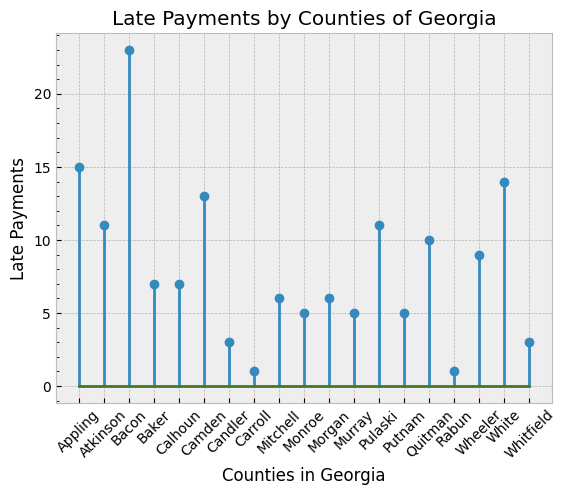

In [464]:
# Calculate Frequency of Late Payments by Counties in Georgia
late_Payment_by_county = tenant_rent_df[tenant_rent_df["Late_Payment"]=="Y"].groupby(["Counties"])["Late_Payment"].count()
county = []
late_payment_freq = []
for index, freq in late_Payment_by_county.items():
    county.append(index)
    late_payment_freq.append(freq)

fig, ax = plt.subplots()
plt.style.use("bmh")
plt.stem(county, late_payment_freq)
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.yaxis.set_minor_formatter(ScalarFormatter())
plt.xticks(rotation=45)
plt.xlabel("Counties in Georgia")
plt.ylabel("Late Payments")
plt.title("Late Payments by Counties of Georgia")

## Applicant Data Analysis

In [465]:
#Show a subset of Applicant Data
applicant_info_df.head(5)

,Applicant_UUID,Applicant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Applicant_Screening_Score,House_Plan,Counties,Monthly_Income
0,Applicant_1,Andrew Green,1850,2023-12-19,2024-12-18,566,1BHK,White,3200
1,Applicant_2,Gary Stewart,1550,2023-03-04,2023-08-31,653,2BHK,Candler,1950
2,Applicant_3,Mark Clark,1050,2023-05-05,2023-06-04,614,1BHK,Candler,16500
3,Applicant_4,Gary Bailey,1250,2023-01-06,2024-01-06,716,3BHK,Baker,2400
4,Applicant_5,Mary Scott,1350,2023-12-23,2024-06-20,482,2BHK,White,2600


In [466]:
# Convert Date Columns from Object to Datetime
applicant_info_df[["Lease_Start_Date", "Lease_End_Date"]] = applicant_info_df[["Lease_Start_Date", "Lease_End_Date"]].apply(pd.to_datetime)

# Calculate lease duration
applicant_info_df["Lease_Duration"] = applicant_info_df["Lease_End_Date"] - applicant_info_df["Lease_Start_Date"]


In [467]:
# Reject Application if Applicant Screening Score based on conditions:
# Screening Score > 559: Accept
# Screening Score < 524: Reject
# Screening Score >= 524 and Screening Score <= 537
#
# https://www.turbotenant.com/blog/what-is-a-tenant-screening-report/

def application_decision(aid):
    if aid["Applicant_Screening_Score"]<524:
        return "N"
    elif aid["Applicant_Screening_Score"]>559 and aid["Applicant_Screening_Score"]<=850:
        return "Y"
    elif aid["Applicant_Screening_Score"]>=524 and aid["Applicant_Screening_Score"]<=537 and aid["Rent_Amount"] <= aid["Monthly_Income"]/2:
        return "Y"
    elif aid["Applicant_Screening_Score"]>537 and aid["Applicant_Screening_Score"]<=559 and aid["Rent_Amount"] <= aid["Monthly_Income"]/1.5:
        return "Y"
    else:
        return "N"
        
applicant_info_df["Application_Decision"] = applicant_info_df.apply(application_decision, axis=1)

#Added Application Decision
applicant_info_df.head(10)

,Applicant_UUID,Applicant_Name,Rent_Amount,Lease_Start_Date,Lease_End_Date,Applicant_Screening_Score,House_Plan,Counties,Monthly_Income,Lease_Duration,Application_Decision
0,Applicant_1,Andrew Green,1850,2023-12-19,2024-12-18,566,1BHK,White,3200,365 days,Y
1,Applicant_2,Gary Stewart,1550,2023-03-04,2023-08-31,653,2BHK,Candler,1950,180 days,Y
2,Applicant_3,Mark Clark,1050,2023-05-05,2023-06-04,614,1BHK,Candler,16500,30 days,Y
3,Applicant_4,Gary Bailey,1250,2023-01-06,2024-01-06,716,3BHK,Baker,2400,365 days,Y
4,Applicant_5,Mary Scott,1350,2023-12-23,2024-06-20,482,2BHK,White,2600,180 days,N
5,Applicant_6,Shirley Collins,850,2023-04-06,2023-05-06,807,2BHK,Mitchell,12000,30 days,Y
6,Applicant_7,Sarah Martin,1700,2023-01-03,2023-07-02,516,1BHK,Montgomery,10200,180 days,N
7,Applicant_8,Matthew Clark,1650,2023-10-17,2024-04-14,817,2BHK,Montgomery,11900,180 days,Y
8,Applicant_9,John Morales,950,2023-12-01,2024-05-29,530,1BHK,Baker,7700,180 days,Y
9,Applicant_10,Jacob Thompson,1500,2023-11-23,2024-05-21,632,3BHK,Putnam,5400,180 days,Y


In [ ]:
# Calculate Average Base Rent being paid by Tenants per House Plan per lease start month across all counties
avg_lock_in_rent = tenant_info_df.groupby([tenant_info_df["Lease_Start_Date"].dt.month, "House_Plan"])["Rent_Amount"].mean().round(2)

#Calculate number of applications and group it by their lease start month
app_per_month = applicant_info_df.groupby([applicant_info_df["Lease_Start_Date"].dt.month, "House_Plan"])["Applicant_UUID"].count()

#Prepare Data to plot
month_x_axis = [month for month in month_map.values()]
avg_rent_1bhk = [0] * 12
avg_rent_2bhk = [0] * 12
avg_rent_3bhk = [0] * 12

for ind, value in avg_lock_in_rent.items():
    if ind[1] == "1BHK":
        avg_rent_1bhk[ind[0]-1] = value
    elif ind[1] == "2BHK":
        avg_rent_2bhk[ind[0]-1] = value
    elif ind[1] == "3BHK":
        avg_rent_3bhk[ind[0]-1] = value

apps_1bhk = [0] * 12
apps_2bhk = [0] * 12
apps_3bhk = [0] * 12

for ind, value in app_per_month.items():
    if ind[1] == "1BHK":
        apps_1bhk[ind[0]-1] = value
    elif ind[1] == "2BHK":
        apps_2bhk[ind[0]-1] = value
    elif ind[1] == "3BHK":
        apps_3bhk[ind[0]-1] = value

## Exploratory Analysis comparing average rent paid by existing tenants for a house plan to the number of new applications

Text(0.5, 1.0, 'Current Average Rent of 1BHK Offerings vs. Number of Applicants of 1BHK')

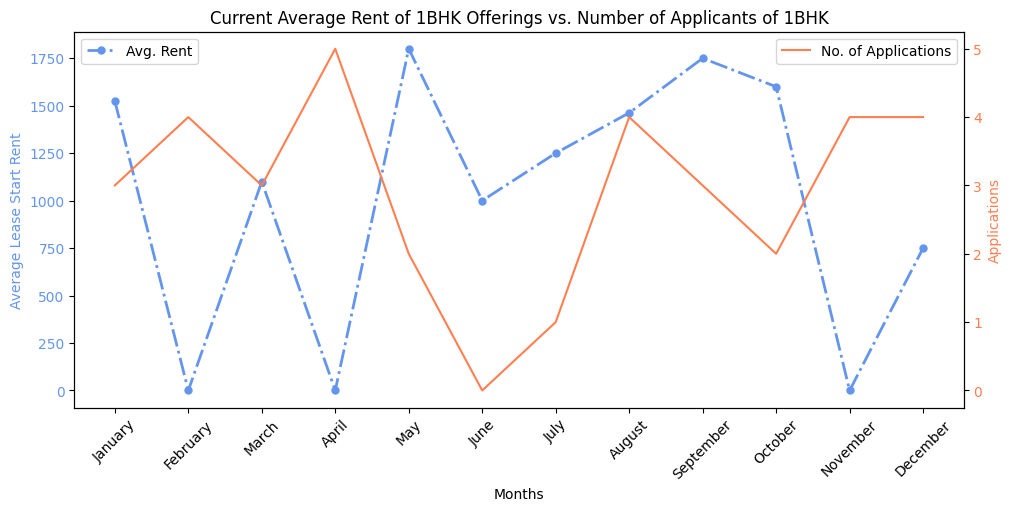

In [518]:
fig, ax1 = plt.subplots(figsize=(10, 5), layout='constrained')
plt.style.use("default")

ax1.set_xlabel('Months')
plt.xticks(rotation=45)
ax1.set_ylabel('Average Lease Start Rent', color="cornflowerblue")
ax1.plot(month_x_axis, avg_rent_1bhk, marker='o', linestyle='dashdot', linewidth=2, markersize=5, color="cornflowerblue", label = "Avg. Rent")
ax1.tick_params(axis='y', labelcolor="cornflowerblue")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Applications', color="coral")
ax2.plot(month_x_axis, apps_1bhk, color="coral", label = "No. of Applications")
ax2.tick_params(axis='y', labelcolor="coral")
ax2.legend(loc="upper right")
plt.title("Current Average Rent of 1BHK Offerings vs. Number of Applicants of 1BHK")

Text(0.5, 1.0, 'Current Average Rent of 2BHK Offerings vs. Number of Applicants of 2BHK')

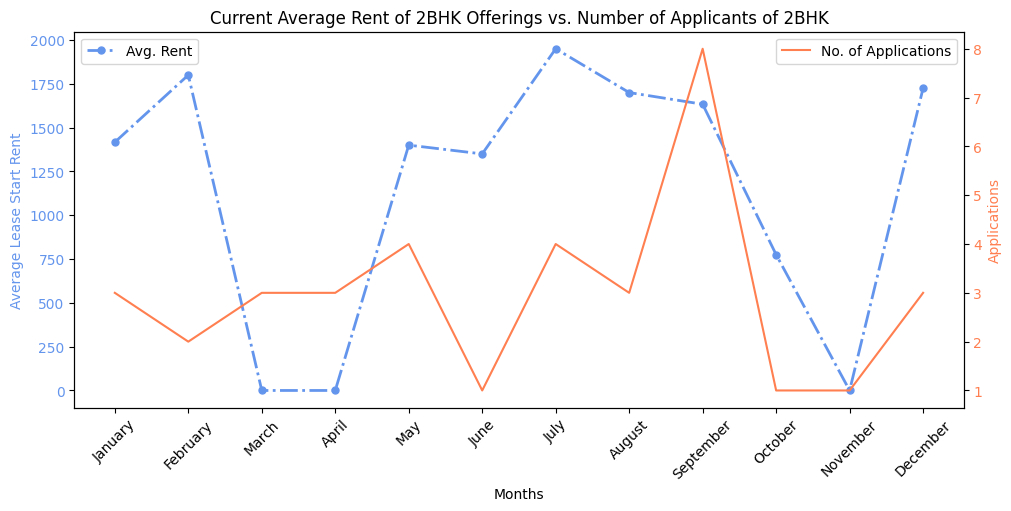

In [513]:
fig, ax1 = plt.subplots(figsize=(10, 5), layout='constrained')
plt.style.use("default")

ax1.set_xlabel('Months')
plt.xticks(rotation=45)
ax1.set_ylabel('Average Lease Start Rent', color="cornflowerblue")
ax1.plot(month_x_axis, avg_rent_2bhk, marker='o', linestyle='dashdot', linewidth=2, markersize=5, color="cornflowerblue", label = "Avg. Rent")
ax1.tick_params(axis='y', labelcolor="cornflowerblue")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Applications', color="coral")
ax2.plot(month_x_axis, apps_2bhk, color="coral", label = "No. of Applications")
ax2.tick_params(axis='y', labelcolor="coral")
ax2.legend(loc="upper right")
plt.title("Current Average Rent of 2BHK Offerings vs. Number of Applicants of 2BHK")

Text(0.5, 1.0, 'Current Average Rent of 3BHK Offerings vs. Number of Applicants of 1BHK')

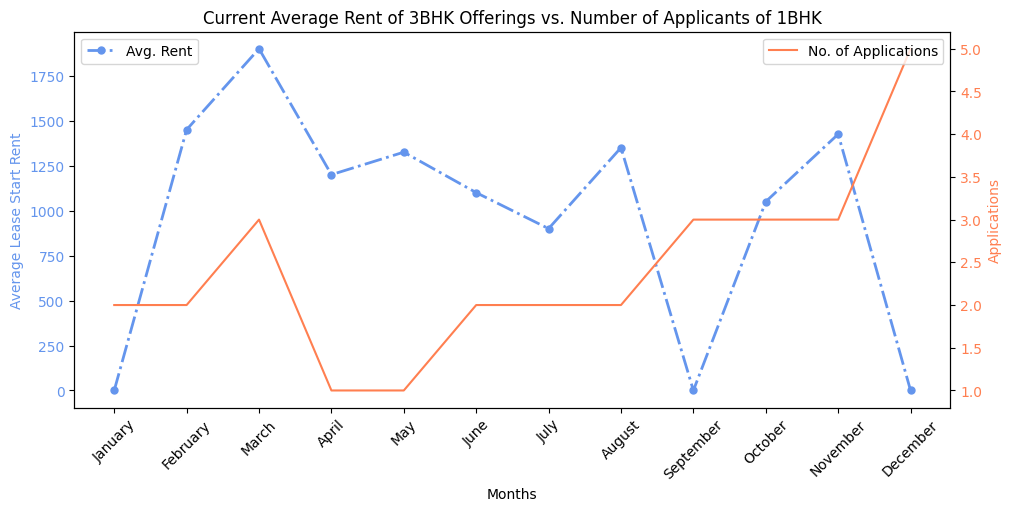

In [515]:
fig, ax1 = plt.subplots(figsize=(10, 5), layout='constrained')
plt.style.use("default")

ax1.set_xlabel('Months')
plt.xticks(rotation=45)
ax1.set_ylabel('Average Lease Start Rent', color="cornflowerblue")
ax1.plot(month_x_axis, avg_rent_3bhk, marker='o', linestyle='dashdot', linewidth=2, markersize=5, color="cornflowerblue", label = "Avg. Rent")
ax1.tick_params(axis='y', labelcolor="cornflowerblue")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Applications', color="coral")
ax2.plot(month_x_axis, apps_3bhk, color="coral", label = "No. of Applications")
ax2.tick_params(axis='y', labelcolor="coral")
ax2.legend(loc="upper right")
plt.title("Current Average Rent of 3BHK Offerings vs. Number of Applicants of 1BHK")